# Installing Packages

In [1]:
pip install tensorflow


   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 1.6/385.2 MB 8.4 MB/s eta 0:00:46
   ---------------------------------------- 3.4/385.2 MB 8.0 MB/s eta 0:00:48
    --------------------------------------- 5.0/385.2 MB 8.2 MB/s eta 0:00:47
    --------------------------------------- 6.8/385.2 MB 8.1 MB/s eta 0:00:47
    --------------------------------------- 8.4/385.2 MB 8.0 MB/s eta 0:00:48
   - -------------------------------------- 10.2/385.2 MB 8.0 MB/s eta 0:00:48
   - -------------------------------------- 11.8/385.2 MB 8.0 MB/s eta 0:00:47
   - -------------------------------------- 13.6/385.2 MB 8.0 MB/s eta 0:00:47
   - -------------------------------------- 15.2/385.2 MB 8.0 MB/s eta 0:00:47
   - -------------------------------------- 17.0/385.2 MB 8.0 MB/s eta 0:00:47
   - -------------------------------------- 18.6/385.2 MB 8.0 MB/s eta 0:00:46
   -- ------------------------------------- 20.4/385.2 MB 8.0 MB

In [2]:
pip install opencv-python


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   - -------------------------------------- 1.6/38.8 MB 8.3 MB/s eta 0:00:05
   --- ------------------------------------ 3.1/38.8 MB 8.0 MB/s eta 0:00:05
   ----- ---------------------------------- 5.0/38.8 MB 7.9 MB/s eta 0:00:05
   ------ --------------------------------- 6.6/38.8 MB 7.9 MB/s eta 0:00:05
   -------- ------------------------------- 8.1/38.8 MB 7.6 MB/s eta 0:00:05
   --------- ------------------------------ 9.7/38.8 MB 7.7 MB/s eta 0:00:04
   ----------- ---------------------------- 11.3/38.8 MB 7.7 MB/s eta 0:00:04
   ------------- -------------------------- 13.1/38.8 MB 7.8 MB/s eta 0:00:04
   --------------- ------------------------ 14.7/38.8 MB 7.8 MB/s eta 0:00:04
   ---------------- ----------------------- 16.3/38.8 MB 7.8 MB/s eta 0:00:03
   ------------------ --------------------- 18.1/38.8 MB 7.8 MB/s eta 0:00:03
   -------------------- ------------------- 19.7/38.8 MB 7.8 MB/s eta 0:00:03

In [3]:
pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------- ------------------------------- 1.6/7.8 MB 7.6 MB/s eta 0:00:01
   ---------------- ----------------------- 3.1/7.8 MB 8.0 MB/s eta 0:00:01
   ------------------------- -------------- 5.0/7.8 MB 8.0 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 7.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------------------------------- ------ 1.8/2.2 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 7.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------- ----------- 1.8/2.6 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 8.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [5]:
import cv2 # pip install opencv-python, 
           # pip install opencv-contrib-python (Full Package)
import os
import matplotlib.pyplot as plt # pip install matplotlib
import numpy as np # pip install numpy

Matplotlib is building the font cache; this may take a moment.


# Reading and Displaying Image

In [9]:
img_array = cv2.imread("C:/Users/ACER/Desktop/pip/train/Closed_Eyes/s0001_00002_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

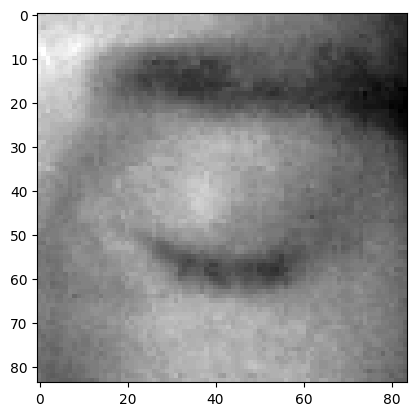

In [10]:
plt.imshow(img_array, cmap="gray") # To plot the Image

In [11]:
img_array.shape # To check the shape of the Image, 86x86 is very small, We have to make it 224x224 (Size used in ImageNet)

(84, 84)

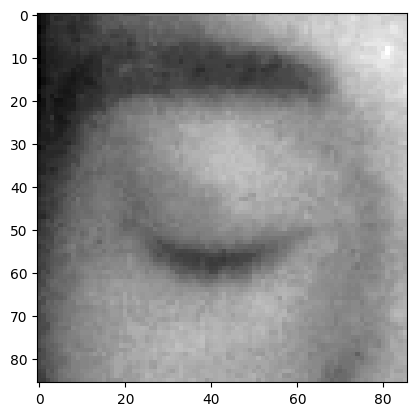

In [13]:
Datadirectory = "C:/Users/ACER/Desktop/pip/train"  # Training Dataset
Classes = ["Closed_Eyes", "Open_Eyes"] # List of Classes

for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break          #Used to display only first image
    break 

# Resizing

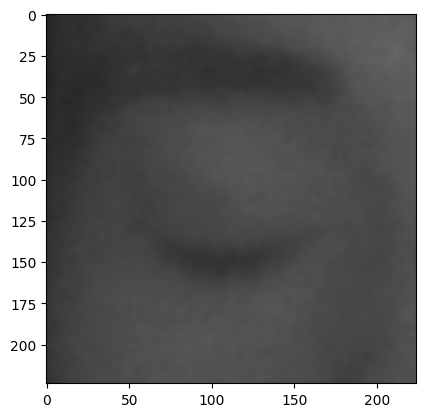

In [14]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

# Reading all the images and converting them into an array for data and labels

In [15]:
# We're reading all images in the gray format because it was already gray. 
# RGB- Three Channels Red-Green-Blue, GrayScale- Single Channel


training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) # 0 1,
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass
        
           

In [16]:
create_training_Data()

In [17]:
print(len(training_Data))

4000


# Random shuffling to avoid overfitting

In [18]:
import random 
random.shuffle(training_Data)

In [19]:
# Appending data into these Lists.

X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3) 
# Here 3 denotes, we've converted our images into RGB because ImageNet consists of RGB Images.

In [20]:
X.shape # 4000 images, 224x224 size, RGB-3

(4000, 224, 224, 3)

# Normalize the Data

In [21]:
X = X/255.0; # we're normalizing it

In [22]:
Y = np.array(y) # Converting Labels into Numpy Array

# Saving our Data

In [23]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# Now the file is stored, we can load it whenever we want!

In [26]:
# pickle_in = open("X.pickle", "rb")
# X = pickle.load(pickle_in)

# pickle_in = open("y.pickle", "rb")
# y = pickle.load(pickle_in)


# Deep Learning Model for Training & Learning

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [27]:
model = tf.keras.applications.mobilenet.MobileNet() # MobileNet is accurate as well as Lightweight.

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [28]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

# Transfer Learning

In [33]:
base_input = model.input # Input

In [34]:
base_output = model.layers[-4].output # Output of the dropout layer by ignoring last three layers.

In [35]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) # One Node (1/0)
final_output = layers.Activation('sigmoid')(final_output)

#Since it's a binary classification, we're using sigmoid activation function.

In [36]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [37]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

# Setting for Binary Classification (open/closed)

In [38]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [39]:
# new_model.fit(X,Y, epochs = 2, validation_split = 0.1) # Training

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 519s 4s/step - accuracy: 0.9682 - loss: 0.0775 - val_accuracy: 0.7725 - val_loss: 0.8627
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 367s 3s/step - accuracy: 0.9969 - loss: 0.0137 - val_accuracy: 0.9800 - val_loss: 0.1513
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 393s 3s/step - accuracy: 0.9984 - loss: 0.0039 - val_accuracy: 0.9975 - val_loss: 0.0080
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 390s 3s/step - accuracy: 1.0000 - loss: 7.1740e-05 - val_accuracy: 1.0000 - val_loss: 2.4970e-05
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 377s 3s/step - accuracy: 1.0000 - loss: 1.8342e-05 - val_accuracy: 1.0000 - val_loss: 1.2643e-06
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 366s 3s/step - accuracy: 1.0000 - loss: 9.4264e-06 - val_accuracy: 1.0000 - val_loss: 5.1651e-07
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 373s 3s/step - accuracy: 1.0000 - loss: 4.1337e-06 - val_accuracy: 1.0000 - val_loss: 3.5666e-07
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 357s 3s/step - accuracy: 

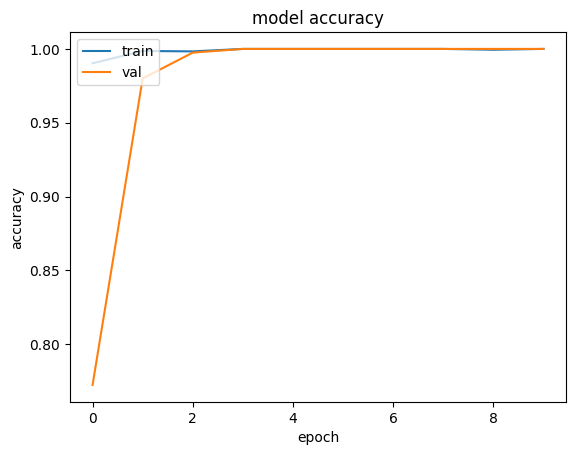

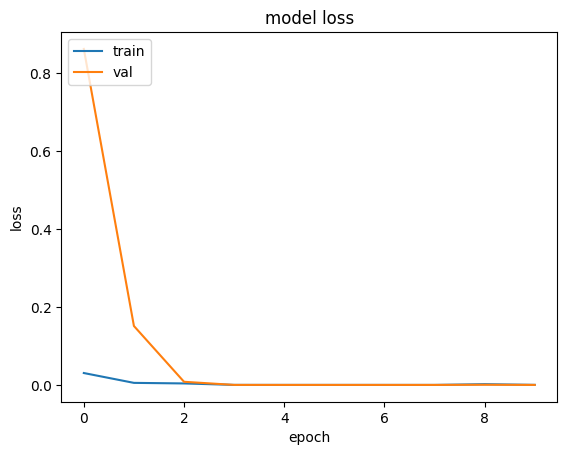

In [40]:
from matplotlib import pyplot as plt
history = new_model.fit(X,Y,validation_split = 0.1, epochs=10)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Note:
### The model is showing irrelevant behavior due to system incompetency. The program requires GPU support for optimizing overfit!

In [41]:
new_model.save('my_model.h5') # Saving my Model

In [31]:
new_model = tf.keras.models.load_model('my_model.h5')

# Checking the Network for Predictions

In [32]:
img_array = cv2.imread("C:/Users/ACER/Desktop/pip/train/Closed_Eyes/s0001_00002_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

In [33]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [34]:
X_input.shape # 1 image, 224x224, RGB

(1, 224, 224, 3)

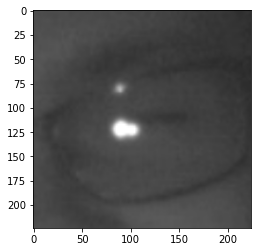

In [35]:
plt.imshow(new_array)

In [36]:
X_input = X_input/255.0

In [37]:
prediction = new_model.predict(X_input)

# For Open Eyes, values tends towards 1 and for Closed Eyes, values tends towards 0

In [38]:
prediction

array([[8.982715e-09]], dtype=float32)

# Let's check on Unknown Images

In [52]:
img = cv2.imread('C:/Users/ACER/Desktop/pip/WhatsApp Image 2024-09-26 at 21.01.32_f0fe8a3a.jpg')

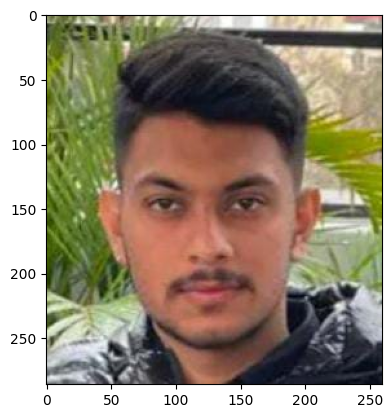

In [53]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Detecting Face and Eyes using Haarcascades

In [54]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

In [55]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [56]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [57]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [58]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

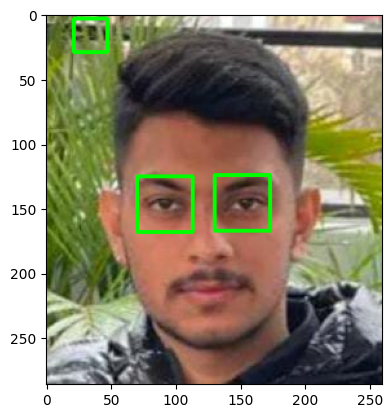

In [59]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Cropping Eye Image

In [60]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w] # Region of Interest = ROI
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
#     if len(eyess) == 0:
#         print("Eyes not detected")
#     else:
    for ex, ey, ew, eh in eyess:
        eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

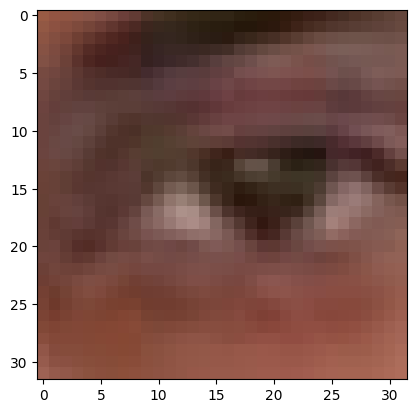

In [61]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [62]:
eyes_roi.shape

(32, 32, 3)

In [63]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0) #Need fourth dimension
final_image = final_image/255.0

In [64]:
final_image.shape

(1, 224, 224, 3)

In [65]:
new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 988ms/step


array([[0.9999969]], dtype=float32)

# Realtime Video Demo

In [66]:
pip install deepface


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------------------------- ------------ 1.6/2.3 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 8.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.5 MB 8.3 MB/s eta 0:00:02
   ----------- ---------------------------- 3.4/11.5 MB 8.0 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.5 MB 7.9 MB/s eta 0:00:01
   ----------------------- ---------------- 6.8/11.5 MB 7.9 MB/s eta 0:00:01
   ----------------------------- ---------- 8.4/11.5 MB 8.0 MB/s eta 0:00:01
   ---------------------------------- ----- 10.0/11.5 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 7.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.wh

In [67]:
from deepface import DeepFace

ValueError: You have tensorflow 2.17.0 and this requires tf-keras package. Please run `pip install tf-keras` or downgrade your tensorflow.

In [68]:
import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0) # Capture through Webcam

#Check if webcam is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Webcam")
    
while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
                
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0) #Need fourth dimension
    final_image = final_image/255.0
    
    
    
    
    Predictions = new_model.predict(final_image)
    if (Predictions>0):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
    
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    # Draw rectangle around faces
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    #Use putText() method for
    #Inserting text on video
    
    cv2.putText(frame, 
                status, 
                (50, 50), 
                font, 3, 
                (0, 0, 255), 
                2, 
                cv2.LINE_4)
    cv2.imshow('Drowsiness Detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    
    
    

Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
False
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
False
Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
False
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
False
Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
False
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
False
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
False
Eyes are not detected
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
False
Eyes are not detected
Eyes are not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
False
Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 ━━━━━━

# If eyes are closed for unusual time, Alarm is generated!

In [69]:
import winsound
frequency = 2500 # Set frequency to 2500 Hertz
duration = 100 # Set Duration to 1000 ms == 1 sec
import numpy as np
import cv2
path = "haarcascade_frontalface_alt.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

cap = cv2.VideoCapture(1)

#Check if webcam is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Webcam")
    
counter = 0    
while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
                
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    # Draw rectangle around faces
    for x,y,w,h in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
        
    # Use putText() method for inserting text on video
    
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0) #Need fourth dimension
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if(Predictions>0):
        status = "Open Eyes"
        cv2.putText(frame,
                   status,
                   (150, 150),
                   font, 3,
                   (0,255,0),
                   2,
                   cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        
        #Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
        
        #Add Text
        cv2.putText(frame, 'Active', (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    else:
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame,
                   status,
                   (150, 150),
                   font, 3,
                   (0,0,255),
                   2,
                   cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255), 2)
        if counter>5:
            x1,y1,w1,h1 = 0,0,175,75
            
        #Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
        #Add Text
            cv2.putText(frame, 'Sleep Alert !!', (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            winsound.Beep(frequency, duration)
            counter = 0
  
    cv2.imshow('Driverness Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    

False


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


# Thank you!